Counter({0: 9990, 1: 10})


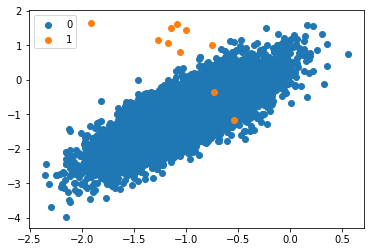

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Using One-Class SVM
https://machinelearningmastery.com/one-class-classification-algorithms/

In [2]:
# define outlier detection model
from sklearn.svm import OneClassSVM
model = OneClassSVM(gamma='scale', nu=0.01)

In [3]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.01, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [5]:
# detect outliers in the test set
yhat = model.predict(testX)

In [6]:
for i in range(0,2000):
    if yhat[i] == 0:
        print(i, yhat[i])

In [7]:
for i in range(0,10000):
    if y[i] == 1:
        print(i, y[i])

834 1
2996 1
3965 1
6111 1
7318 1
7832 1
8436 1
8505 1
8559 1
9228 1


In [7]:
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import classification_report
cr = classification_report(testy, yhat)
print(cr)

In [ ]:
# one-class svm for imbalanced binary classification
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM
# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.999], flip_y=0, random_state=4)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.01)
# fit on majority class
trainX = trainX[trainy==0]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = -1
testy[testy == 0] = 1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)

print('F1 Score: %.3f' % score)


In [ ]:
score2 = f1_score(testy, yhat, pos_label=1)
print('F1 Score: %.3f' % score2)

#### NLP model 

In [ ]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [ ]:
import numpy as np
import pandas as pd

df1 = pd.read_csv('Cleaned-P&P data.csv')

blanks = []  # start with an empty list`

# for i,c,d,inc,sd in df1.itertuples():  # iterate over the DataFrame
#         if c == 'O' or c=='E':         # test 'review' for whitespace
#             blanks.append(i)     # add matching index numbers to the list
df1.drop(blanks, inplace=True)
df1["desc"] = df1["short_des"] + '. ' + df1["desc"]
df1.reset_index(drop=True,inplace=True)


In [ ]:

df2 = pd.read_csv('Cleaned-P&P data.csv')
blanks2 = []  # start with an empty list`

# for i,c,d,inc,sd in df2.itertuples():  # iterate over the DataFrame
#         if c == 'O' or c=='E':         # test 'review' for whitespace
#             blanks2.append(i)     # add matching index numbers to the list
df2.drop(blanks2, inplace=True)
df2.reset_index(drop=True,inplace=True)

In [ ]:
dataset = pd.concat([df1, df2], ignore_index=True)

In [ ]:
# Cleaning the texts
import re
corpus = []
all_words = []
max_len=0
for i in range(0, 504):

    review = re.sub('\w\d{7}', ' ', dataset['desc'][i])
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    
    review = nlp(review)
    review = [word.text for word in review]
   # for word.text in review:
        
    all_words.append(review) 
    if len(review) > max_len:
        max_len = len(review)
    ds = ' '.join(review)
#    for word2vec we want an array of vectors
    corpus.append(ds)
    

In [ ]:
dpf = pd.read_csv('Del-Pass.csv')



In [ ]:
keys_list = dpf['kpattern'].tolist()
regex = re.compile(r'(' + '|'.join(keys_list) + r')') 

In [ ]:
cus_list = ['remove','removed','cancelled', 'cancel' ,'deleted']
regey = re.compile(r'(' + '|'.join(cus_list) + r')') 

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
additional =["thank you","please","hello","hi","advise","hin't","st","nd","rd","th","thank"]
stopwords = stopwords + additional
remov=[]
for ele in stopwords:
    matches = re.findall("n't",ele)
    matches2 = re.findall("'nt",ele)
    if len(matches)>0 or len(matches2)>0:
        remov.append(ele)
stopwords = [word for word in stopwords if word not in remov]

In [ ]:
cldict = {'P':1 , 'R':1, 'E':-1,'O':-1}
dataset['Class Label'] = dataset['class'].map(cldict)
label_series = pd.Series(dataset['Class Label'])

In [ ]:
dataset.head()

In [ ]:
from keras.utils import to_categorical

class_label = np.array(label_series)
y = class_label
y.shape

In [ ]:
X = corpus

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)


In [ ]:

from sklearn.base import BaseEstimator, TransformerMixin
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300
        pass
    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        lemmatized_list=[]
        for snt in X:
        #    print(snt)
            tokens = nlp(snt)
        #    for token in tokenized:
            filtered_sentence = [w.text for w in tokens if not w.text in stopwords]
        #                 lemm = token.lemma_ for token.text in token
        #             lemmatized_list.append(lemm)
            stri = ' '.join(filtered_sentence)
            lemmatized_list.append(stri)
        return [self.nlp(text).vector for text in lemmatized_list]
       


In [ ]:
#segment_featurizer = SegmentFeaturizer()  # more on this below
class CustomLinguisticFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass   
  #  def fit(self, X, y=None):
    def fit(self, X, y):
        return self    
    def transform(self, X):       
        ref_corpus=[]
        for text in X:           
            trans = regex.sub(lambda m: m.group().replace(m.group(),"del-pass"),text)
            trans_ref = regey.sub(lambda n: n.group().replace(n.group(),"delete"),trans)
             
            ref_corpus.append(trans_ref)
       
        return ref_corpus

In [ ]:

#segment_featurizer = SegmentFeaturizer()  # more on this below
class Denseconverter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass   
  #  def fit(self, X, y=None):
    def fit(self, X, y):
        return self    
    def transform(self, X):       
        
       
        return X.toarray()

In [ ]:
len(y_train)

In [ ]:
ind = []
for i in range(0,403):
    if y_train[i] == -1:
  #      y_train.pop[i]
         ind.append(i)
X_train = np.array(X_train)
trainy = np.delete(y_train, ind)
trainx = np.delete(X_train, ind)

In [ ]:
trainx=list(trainx)

### OneClassSVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.decomposition import TruncatedSVD

embeddings_pipeline = Pipeline(
    steps=[
        ("cust",CustomLinguisticFeatureTransformer()),
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", OneClassSVM(gamma='scale', nu=0.03)),
    ]
)


embeddings_pipeline.fit(trainx,trainy)



In [ ]:
embeddings_pipeline2 = OneClassSVM(gamma='scale', nu=0.01)
train_X = [nlp(str(text)).vector for text in trainx]
embeddings_pipeline2.fit(train_X)

### Elyptic Envelope

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.covariance import EllipticEnvelope
#train_X = [nlp(str(text)).vector for text in trainx]
#embeddings_pipeline3 = EllipticEnvelope(contamination=0.01)
embeddings_pipeline3 = Pipeline(
    steps=[
        ("cust",CustomLinguisticFeatureTransformer()),
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
#        ("reduce_dim", TruncatedSVD(50)),
        ("EllipticEnvelope", EllipticEnvelope(contamination=0.01)),
    ]
)
embeddings_pipeline3.fit(trainx,trainy)

### Local Outlier Factor

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from numpy import vstack
# test_X = [nlp(text).vector for text in X_test]
# train_X = [nlp(str(text)).vector for text in trainx]
def lof_predict(embeddings_pipeline4, X_train, X_test):
    # create one large dataset
    composite = X_train + X_test
    #composite = vstack((X_train, X_test))
    #generalize
    ref_corpus=[]
    for text in composite:           
            trans = regex.sub(lambda m: m.group().replace(m.group(),"del-pass"),text)
            trans_ref = regey.sub(lambda n: n.group().replace(n.group(),"delete"),trans)
             
            ref_corpus.append(trans_ref)

    #clean data
    lemmatized_list=[]
    for snt in ref_corpus:
        #    print(snt)
            tokens = nlp(snt)
        #    for token in tokenized:
            filtered_sentence = [w.text for w in tokens if not w.text in stopwords]
        #                 lemm = token.lemma_ for token.text in token
        #             lemmatized_list.append(lemm)
            stri = ' '.join(filtered_sentence)
            lemmatized_list.append(stri)
    lemmatized_list2 = [nlp(text).vector for text in lemmatized_list]
    
    # make prediction on composite dataset
    yhat = embeddings_pipeline4.fit_predict(lemmatized_list2)
    
    # return just the predictions on the test set
    return yhat[len(X_train):]
embeddings_pipeline4 = LocalOutlierFactor(contamination=0.036)



In [ ]:
# ls = [nlp('g7121564 please set ACUSTRSS  to so account holder can receive statements ').vector]
# test_X.append(ls)
yhat = lof_predict(embeddings_pipeline4, X_train, X_test)

In [ ]:
stri='laptop america straw eat glucose'
abc=[]
abc.append(stri)
print(len(abc[0]))
rat = lof_predict(embeddings_pipeline4, X_train, abc)
rat

In [ ]:
len(yhat)

In [ ]:
from sklearn.metrics import classification_report
lof_cr = classification_report(y_test, yhat)
print(lof_cr)
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,yhat))

In [ ]:
Faulty_Xtest =[]
tot = 0
for i in range(0,102):
    if yhat[i] != y_test[i]:
        tot+=1
        print(f'Text:{X_test[i]}||', f'predicted class:{yhat[i]}||', f'Index is : {i}')
        Faulty_Xtest.append(X_test[i])
print(f'total is: {tot}')

## Using tfidf

#### tfidf with oneclass SVM

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

embeddings_pipeline5 = Pipeline(
    steps=[
        ("cust",CustomLinguisticFeatureTransformer()),
#        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ('tfidf', TfidfVectorizer()),
#        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", OneClassSVM(gamma='scale', nu=0.01)),
    ]
)


embeddings_pipeline5.fit(trainx,trainy)



#### tfid with elyptic envelope

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.feature_extraction.text import TfidfVectorizer
#train_X = [nlp(str(text)).vector for text in trainx]
nparray = np.array(trainx)
#embeddings_pipeline3 = EllipticEnvelope(contamination=0.01)
embeddings_pipeline6 = Pipeline(
    steps=[
        ("cust",CustomLinguisticFeatureTransformer()),
        ('tfidf', TfidfVectorizer()),        
        ("reduce_dim", TruncatedSVD(100)),
#        ("Denseconverter",Denseconverter()),
        ("EllipticEnvelope", EllipticEnvelope(contamination=0.01)),
    ]
)
embeddings_pipeline6.fit(nparray,trainy)

### Test of Classifiers

In [ ]:
from sklearn.metrics import classification_report
#test_X = [nlp(str(text)).vector for text in X_test]
#test_X = [nlp('g7121564 please set ACUSTRSS  to so account holder can receive statements ').vector]
y_pred = embeddings_pipeline5.predict(X_test)
cr = classification_report(y_test, y_pred)
y_pred

In [ ]:
print(cr)

In [ ]:

from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
list1 = ['customer purchased delivery aubscription rv fm she is still being charged deliver please can you activate delivery subscription thank you']
#list1 = ['g7121564 please set ACUSTRSS  to so account holder can receive statements']
#list1 = [nlp('g7121564 please set ACUSTRSS  to so account holder can receive statements ').vector]
#list1 = np.array(list1)
print(embeddings_pipeline.predict(list1))
#probs = embeddings_pipeline.predict_proba(list1)
#np.around(probs, decimals = 3)*100

In [ ]:
for i in range (0,101):
    if y_test[i] == -1:
        print(X_test[i], y_test[i])

In [ ]:
Faulty_Xtest =[]
tot = 0
for i in range(0,101):
    if y_pred[i] != y_test[i]:
        tot+=1
        print(f'Text:{X_test[i]}||', f'predicted class:{y_pred[i]}||', f'Index is : {i}')
        Faulty_Xtest.append(X_test[i])
print(f'total is: {tot}')

In [ ]:
arr = np.array(Faulty_Xtest)
arr

In [ ]:
import pickle
filename = 'OneClassSVM.pk1'
pickle.dump(embeddings_pipeline, open(filename, 'wb'))
#embeddings_pipeline.write().overwrite().save('OneClassSVM.h5')

In [ ]:
from joblib import dump, load
dump(embeddings_pipeline4, filename = 'LocalOutlierFac.joblib' )

In [ ]:
loaded_model = load(filename = 'LocalOutlierFac.joblib')


In [ ]:
test_X = [nlp(str(text)).vector for text in X_test]

joblib_preds = loaded_model.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,joblib_preds)

In [ ]:
joblib_preds

In [ ]:
yhat = lof_predict(loaded_model, trainx, test_X)
yhat

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,yhat)

In [ ]:
len(test_X[0])

In [ ]:
np.save('tranx',trainx)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = cv.fit_transform(X)

### NMF

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=2,random_state=42)

In [ ]:
# This can take awhile, we're dealing with a large amount of documents!
LDA.fit(dtm)

In [ ]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')